In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

url = 'ml_python_labexam_2023_02_03.csv'
df = pd.read_csv(url)
df

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948
...,...,...,...,...,...,...,...,...,...,...,...
995,0.002408,0.014426,0.000431,0.602524,0.000004,0.009581,-0.023913,-0.001353,-0.018564,0.000913,-0.448586
996,0.020778,-0.006045,0.009457,0.458784,0.973221,-0.001016,-0.017422,0.028203,-0.028976,0.026134,1.310119
997,0.043912,0.002790,-0.013574,0.708325,0.138217,-0.010312,-0.000105,-0.007212,0.026115,-0.033076,1.080259
998,0.023909,0.001852,-0.003766,0.355062,0.948760,-0.002189,0.006000,0.012622,0.025405,-0.019235,3.540203


In [26]:
print(f"the shape of df is {df.shape}")

the shape of df is (1000, 11)


In [27]:
X, y = df.drop(columns = ['y']), df['y']

print(f"the shape of X is {X.shape}")
print(f"the shape of y is {y.shape}")

the shape of X is (1000, 10)
the shape of y is (1000,)


<Axes: >

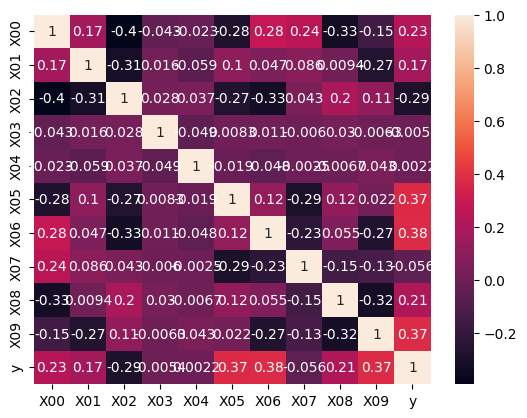

In [28]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)
print(f"we have {Xtrain.shape[0]} samples for train")
print(f"we have {Xtest.shape[0]} samples for test")

we have 700 samples for train
we have 300 samples for test


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression(fit_intercept = False)
lm.fit(Xtrain, ytrain)
ypred_lm = lm.predict(Xtest)

mse = mean_squared_error(ytest, ypred_lm, squared=False)
print(f"mse = {mse}")

mse = 0.8973600782797275


In [31]:
table = pd.DataFrame({'features':X.columns, 'coefficients':lm.coef_})
table 

,features,coefficients
0,X00,46.062969
1,X01,30.420060
2,X02,-0.344479
3,X03,0.286425
4,X04,0.522241
5,X05,56.188125
6,X06,57.203464
7,X07,31.341540
8,X08,72.389729
9,X09,79.333549


In [32]:
results = pd.DataFrame(columns = ['degree', 'mse'])

for degree in range(1, len(X.columns)):
    
    # prepare the dataset 
    myX = X.iloc[:, :degree]
    myX = pd.DataFrame(myX, columns = X.columns[:degree])
    
    # split 
    Xtrain, Xtest, ytrain, ytest = train_test_split(myX, y, random_state = 42, train_size = 0.7)
    
    # train the model 
    lm = LinearRegression(fit_intercept=False)
    lm.fit(Xtrain, ytrain)
    
    # prediction
    ypred = lm.predict(Xtest)
    
    # compute metrics 
    mse = mean_squared_error(ytest, ypred, squared = False)
    
    # update results 
    results.loc[len(results)] = [degree, mse]

results

,degree,mse
0,1.0,2.382671
1,2.0,2.359532
2,3.0,2.334076
3,4.0,2.291007
4,5.0,2.284061
5,6.0,2.085242
6,7.0,2.030102
7,8.0,2.027504
8,9.0,1.934231


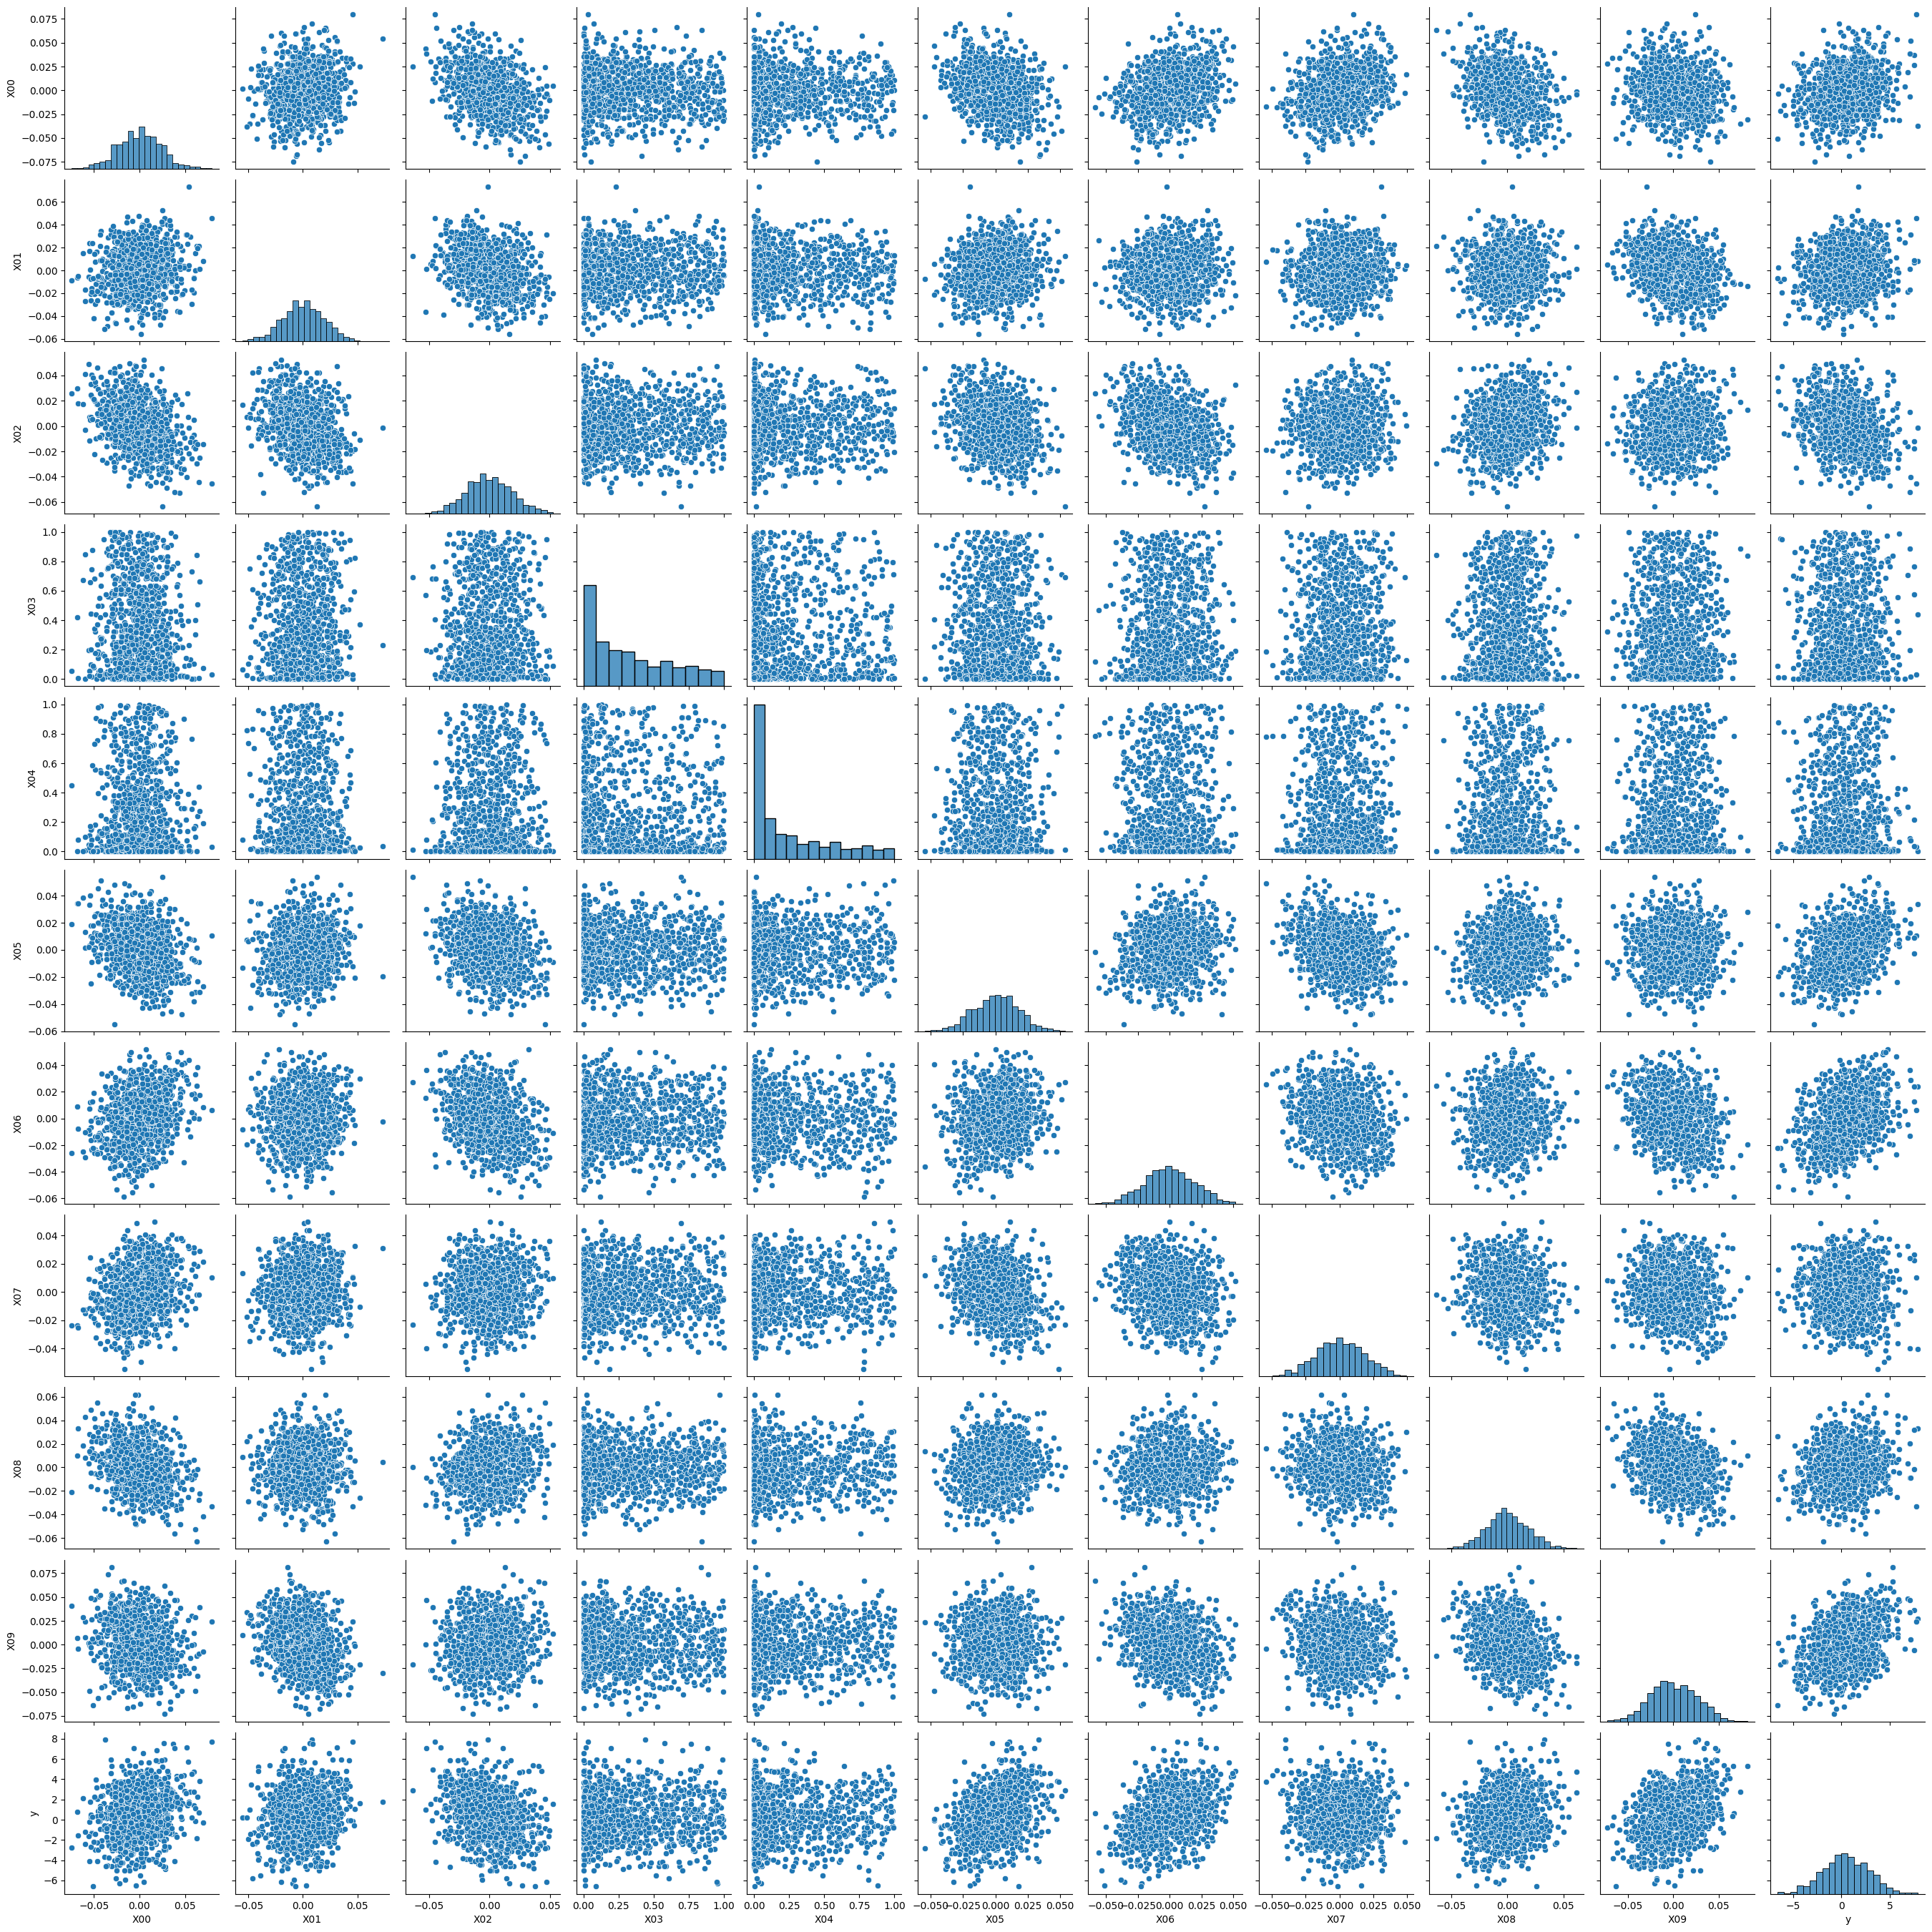

In [33]:
sns.pairplot(df)
plt.show()

In [35]:
Xnew = X.drop(columns = ['X03', 'X04', 'X07'])

Xtrain, Xtest, ytrain, ytest = train_test_split(Xnew, y, random_state=42, train_size=.7)

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(Xtrain, ytrain)
ypred = dt.predict(Xtest)

mse = mean_squared_error(ytest, ypred, squared = False)
max_depth = dt.tree_.max_depth

print(f"mse = {mse}, max_depth = {max_depth}")


mse = 2.0287272981906717, max_depth = 20


In [39]:
# tune the decision tree regressor 
from sklearn.model_selection import GridSearchCV

params = [{'max_depth':[*range(1, max_depth+1)]}]

gs = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = params, scoring = 'neg_mean_squared_error')
gs.fit(Xtrain, ytrain)
ypred = gs.predict(Xtest)

print(f"the bets params are {gs.best_params_}")

the bets params are {'max_depth': 7}


In [41]:
dt = DecisionTreeRegressor(max_depth = 7)
dt.fit(Xtrain, ytrain)
ypred = dt.predict(Xtest)

mse = mean_squared_error(ytest, ypred, squared=False)
print(mse)

2.0546494799759163
